# Lead Scoring 

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [3]:
# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Data Preparation

### Data Loading

In [4]:
inp_leads = pd.DataFrame(pd.read_csv('Leads.csv'))
inp_leads.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
inp_leads.shape

(9240, 37)

In [6]:
inp_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
inp_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [8]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
inp_leads = inp_leads.replace('Select', np.nan)

## Checking the Duplicates

By observing the above data , we notice that the Prospect ID and Lead Number can affect over readings if they have aby unique/duplicates value , so we have to check for the duplicates value for these two's

For Prospect ID

In [9]:
sum(inp_leads.duplicated(subset = 'Prospect ID')) == 0

True

No duplicate values in Prospect ID

### For Lead Number

In [10]:
sum(inp_leads.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in Lead Number

As we can notice that the ('Prospect ID' & 'Lead Number') are two variables that are just indicative of the ID number of the Contacted People , thus these two can be dropped , as they have little role in our data modelling.

In [11]:
inp_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
round(100*(inp_leads.isnull().sum()/len(inp_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [13]:
# we will drop the columns having more than 40% NA values.
inp_leads = inp_leads.drop(inp_leads.loc[:,list(round(100*(inp_leads.isnull().sum()/len(inp_leads.index)), 2)>40)].columns, 1)

In [14]:
inp_leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,Other Metro Cities,No,No,SMS Sent


Dropping Lead Number and Prospect ID

In [15]:
inp_leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
inp_leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,Other Metro Cities,No,No,SMS Sent


We can see that  'Select' values in some places , we can convert into NAN as they can make our data noisy.

In [16]:
#Converting 'Select' values to NaN.

inp_leads = inp_leads.replace('Select', np.nan)

In [17]:
inp_leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,Other Metro Cities,No,No,SMS Sent


## Dropping unique valued columns

In [18]:
inp_leads= inp_leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [19]:
inp_leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,wrong number given,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,invalid number,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,NaN,Other Metro Cities,No,SMS Sent


## Categorical Analysis:

Country

In [20]:
round(100*(inp_leads['Country'].isnull().sum()/len(inp_leads['Country'].index)), 2)

26.63

In [21]:
inp_leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Kuwait                     4
Sweden                     3
Netherlands                2
Ghana                      2
Asia/Pacific Region        2
China                      2
Philippines                2
Belgium                    2
Italy                      2
Bangladesh                 2
Uganda                     2
Russia                     1
Tanzania                   1
Switzerland                1
Liberia                    1
Sri Lanka                  1
Indonesia     

We can see that the India is the most common occurence among the non-missing values we can impute all missing values with India

In [22]:
inp_leads['Country'] = inp_leads['Country'].replace(np.nan,'India')
inp_leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,wrong number given,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,invalid number,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,NaN,Other Metro Cities,No,SMS Sent


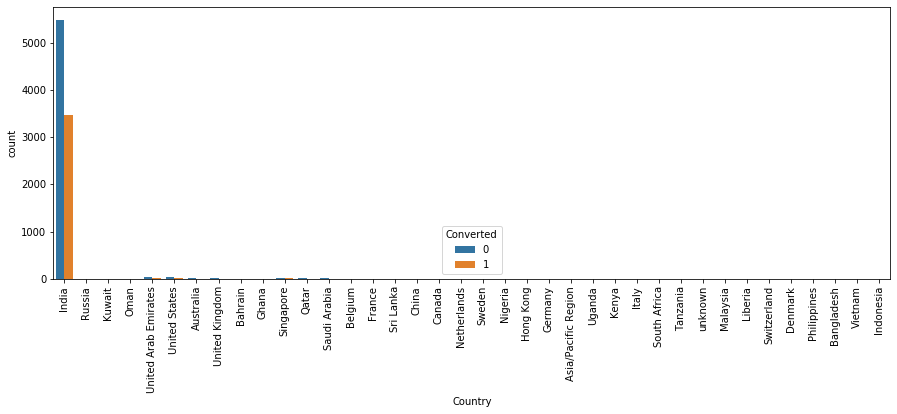

In [23]:
plt.figure(figsize=(15,5))
s1=sns.countplot(inp_leads.Country, hue=inp_leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

By the above graph we can notice that the number of Values for India are very high as compared to other's ,it is more than 95% of the total

City

In [24]:
inp_leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We can see that the Mumbai is the most common occurence among the non-missing values we can impute all missing values with Mumbai

In [25]:
inp_leads['City'] = inp_leads['City'].replace(np.nan,'Mumbai')

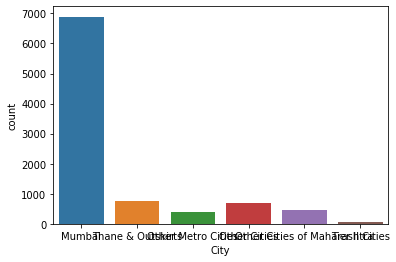

In [27]:
sns.countplot(inp_leads.City)


 Specailization

In [28]:
inp_leads.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [29]:
#checking value counts of Specialization column

inp_leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In  this data Leads  not have mentioned specialization because it was not in the list . Thus we will replace NaN values here with 'Not Mentioned'



In [30]:
inp_leads['Specialization'] = inp_leads['Specialization'].replace(np.nan, 'Not Mentioned')

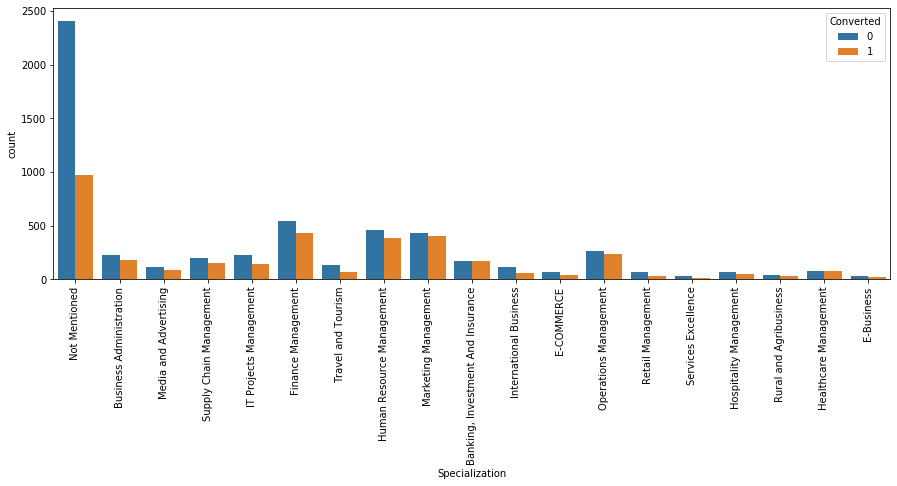

In [31]:
plt.figure(figsize=(15,5))
s1=sns.countplot(inp_leads.Specialization, hue=inp_leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We can observe  that the 'Specialization' with Management in them have higher number of leads as well as leads converted. Thus we should not be dropped it , but make it more valuable.

#### Combining Management Specializations

In [32]:
inp_leads['Specialization'] = inp_leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')  

In [33]:
inp_leads['Specialization']

0                 Not Mentioned
1                 Not Mentioned
2       Business Administration
3         Media and Advertising
4                 Not Mentioned
                 ...           
9235                 Management
9236      Media and Advertising
9237    Business Administration
9238                 Management
9239                 Management
Name: Specialization, Length: 9240, dtype: object

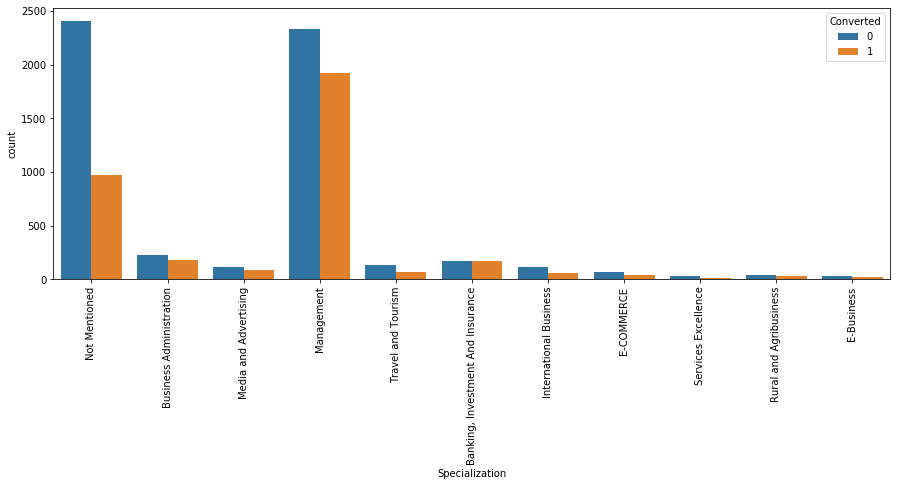

In [34]:
plt.figure(figsize=(15,5))
s1=sns.countplot(inp_leads.Specialization, hue=inp_leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Occupation

In [35]:
inp_leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [36]:
inp_leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [37]:
#imputing Nan values with mode "Unemployed"

inp_leads['What is your current occupation'] = inp_leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [38]:
inp_leads['What is your current occupation']

0       Unemployed
1       Unemployed
2          Student
3       Unemployed
4       Unemployed
           ...    
9235    Unemployed
9236    Unemployed
9237    Unemployed
9238    Unemployed
9239    Unemployed
Name: What is your current occupation, Length: 9240, dtype: object

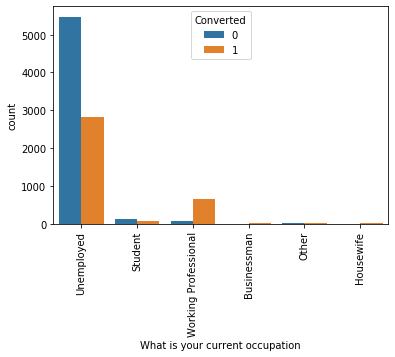

In [39]:
s1=sns.countplot(inp_leads['What is your current occupation'], hue=inp_leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Observations :

1) Working Professionals take the course have high chances .
2) Unemployed leads are the most in terms of Absolute numbers.

#### What matters most to you in choosing a course

In [40]:
inp_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [41]:
inp_leads['What matters most to you in choosing a course'] = inp_leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

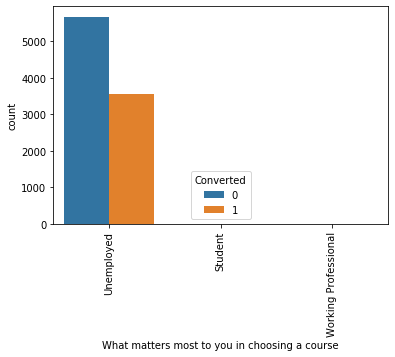

In [42]:
#visualizing

s2=sns.countplot(inp_leads['What matters most to you in choosing a course'], hue=inp_leads.Converted)
s2.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [43]:
inp_leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Tag

In [44]:
#checking value counts of Tag variable
inp_leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [45]:
inp_leads['Tags'].describe

<bound method NDFrame.describe of 0               Interested in other courses
1                                   Ringing
2       Will revert after reading the email
3                                   Ringing
4       Will revert after reading the email
                       ...                 
9235    Will revert after reading the email
9236                     wrong number given
9237                         invalid number
9238                                    NaN
9239    Will revert after reading the email
Name: Tags, Length: 9240, dtype: object>

In [46]:
inp_leads['Tags'] = inp_leads['Tags'].replace(np.nan,'Not Specified')

In [47]:
inp_leads['Tags'].describe

<bound method NDFrame.describe of 0               Interested in other courses
1                                   Ringing
2       Will revert after reading the email
3                                   Ringing
4       Will revert after reading the email
                       ...                 
9235    Will revert after reading the email
9236                     wrong number given
9237                         invalid number
9238                          Not Specified
9239    Will revert after reading the email
Name: Tags, Length: 9240, dtype: object>

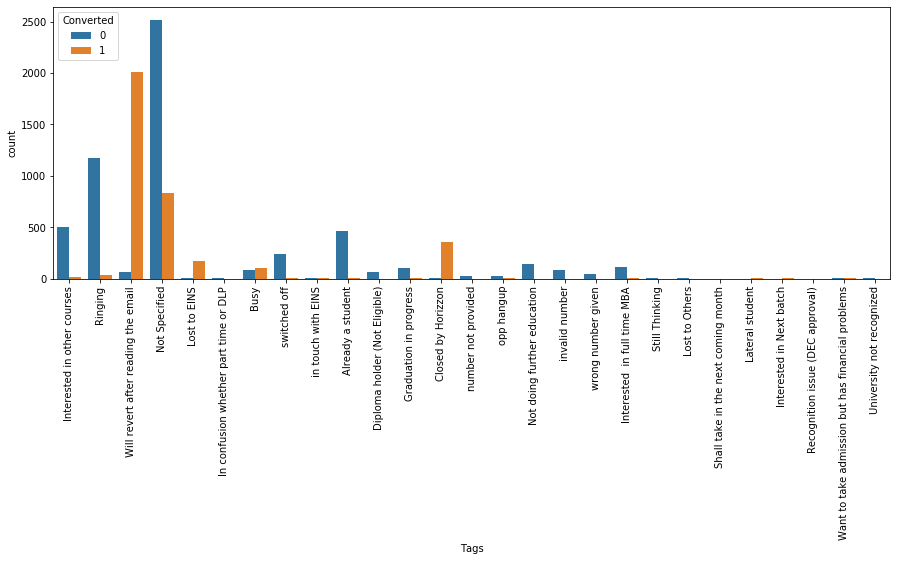

In [48]:
plt.figure(figsize=(15,5))
s1=sns.countplot(inp_leads['Tags'], hue=inp_leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We have to replace the  tags with low frequency with "Other Tags"

In [49]:
inp_leads['Tags'] = inp_leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

inp_leads['Tags'] = inp_leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [50]:
inp_leads['Tags']

0               Interested in other courses
1                                   Ringing
2       Will revert after reading the email
3                                   Ringing
4       Will revert after reading the email
                       ...                 
9235    Will revert after reading the email
9236                             Other_Tags
9237                             Other_Tags
9238                          Not Specified
9239    Will revert after reading the email
Name: Tags, Length: 9240, dtype: object

### Columns to be droppped



In [51]:
cols_to_drop=['Country','What matters most to you in choosing a course']

Checking missing values

In [52]:
round(100*(inp_leads.isnull().sum()/len(inp_leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

 Rest missing values are under 2% so we can drop these rows.


In [53]:
inp_leads.dropna(inplace = True)

#### Checking value counts of Lead Source 


In [54]:
inp_leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
testone                 1
welearnblog_Home        1
youtubechannel          1
blog                    1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

# Replacing Nan Values 



Also We will group some of the lower frequency occuring labels under a common label 'Others'

In [55]:
inp_leads['Lead Source'] = inp_leads['Lead Source'].replace(np.nan,'Others')
inp_leads['Lead Source'] = inp_leads['Lead Source'].replace('google','Google')
inp_leads['Lead Source'] = inp_leads['Lead Source'].replace('Facebook','Social Media')
inp_leads['Lead Source'] = inp_leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')    

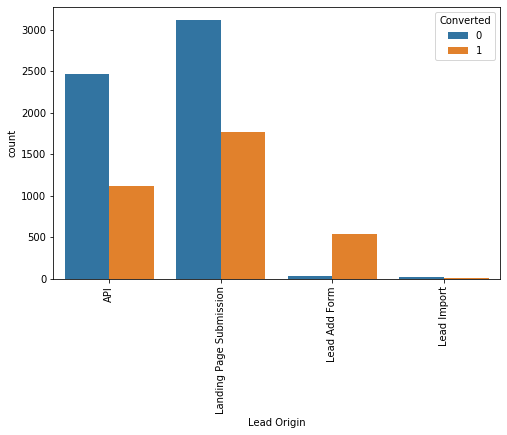

In [56]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(inp_leads['Lead Origin'], hue=inp_leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Output
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. Lead Import are very less in count.
4. Quick Add Form get very few leads


__To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.__

### Lead Source

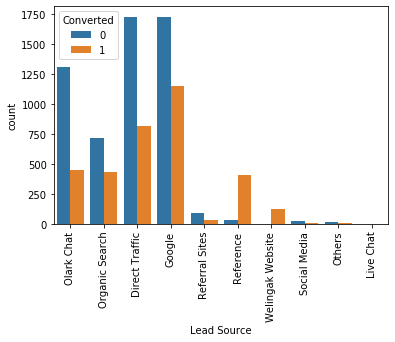

In [57]:
s1=sns.countplot(inp_leads['Lead Source'], hue=inp_leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

## OUTCOMES :
1) Maximum number of leads are BY Google and Direct traffic.

2) Conversion Rate of reference leads and welingak website is high.

__To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google  leads and generate more leads from reference and welingak website.__

### Do Not Email & Do Not Call

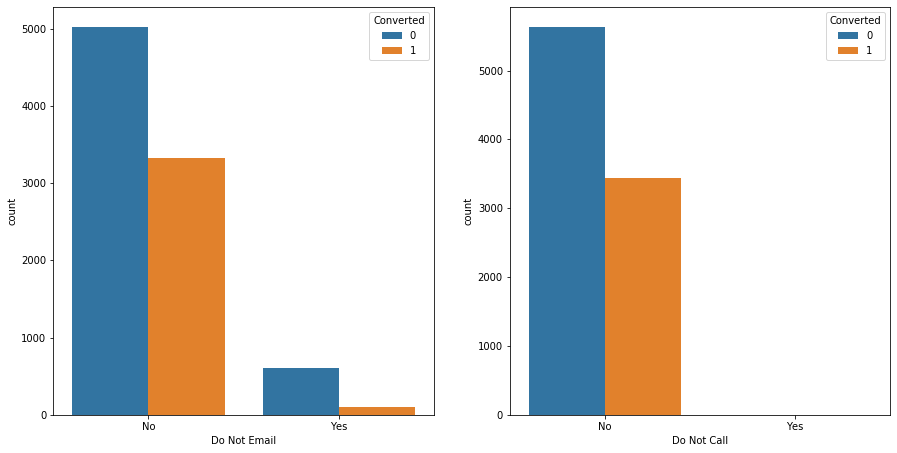

In [58]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = inp_leads, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = inp_leads, ax = axs[1])

### Last Notable Activity

In [114]:
inp_leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [115]:
#clubbing lower frequency values

inp_leads['Last Notable Activity'] = inp_leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

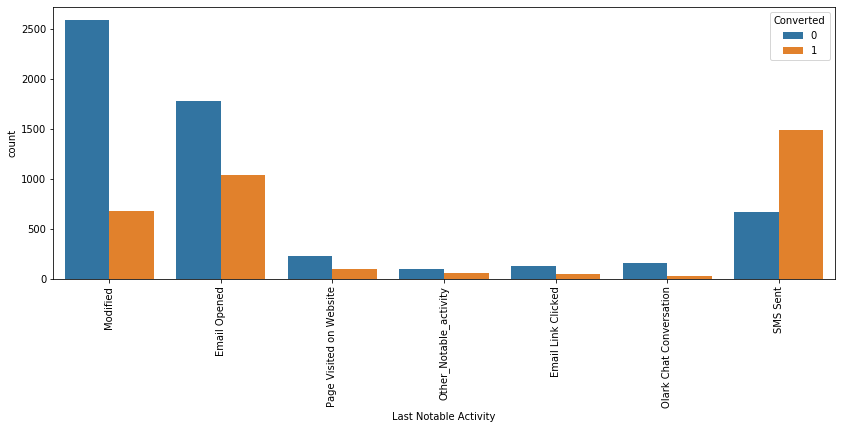

In [116]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data =inp_leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [118]:
inp_leads['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      158
Name: Last Notable Activity, dtype: int64

In [59]:
#checking value counts for Do Not Call
inp_leads['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [60]:
#checking value counts for Do Not Email
inp_leads['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

Append the Do Not Call Column to the list of Columns to be Dropped since > 92% is of only one Value

In [61]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

### Total Visits

In [62]:
inp_leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

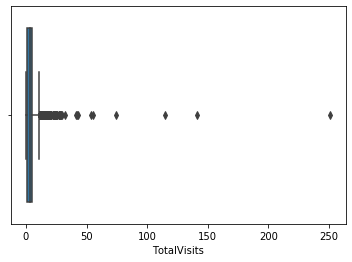

In [63]:
sns.boxplot(inp_leads['TotalVisits'])

We can notice that there are a number of outliers in the data.

In [64]:
percentiles = inp_leads['TotalVisits'].quantile([0.05,0.95]).values
inp_leads['TotalVisits'][inp_leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
inp_leads['TotalVisits'][inp_leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

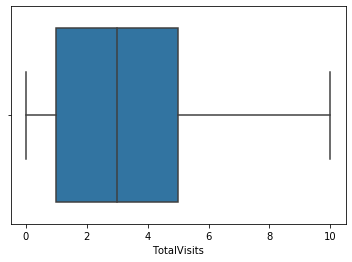

In [65]:
sns.boxplot(inp_leads['TotalVisits'])

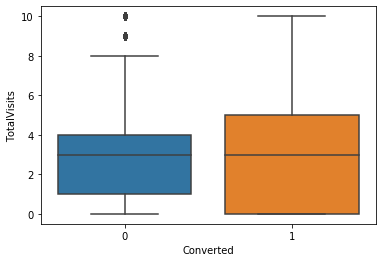

In [66]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = inp_leads)

#### OUTCOMES

__Nothng conclusive can be said on the basis of Total Visits.__

### Total time spent on website

In [67]:
inp_leads['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

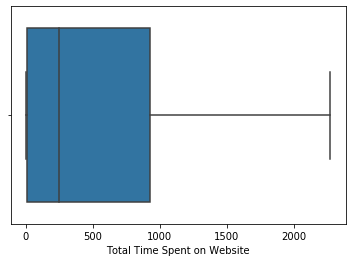

In [68]:
sns.boxplot(inp_leads['Total Time Spent on Website'])

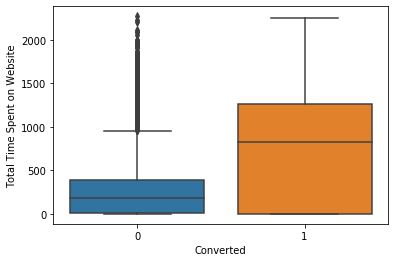

In [69]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = inp_leads)

#### Findings
1. Leads spending more time on the weblise are more likely to be converted.

__Website should be made more engaging to make leads spend more time.__

### Page views per visit

In [70]:
inp_leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

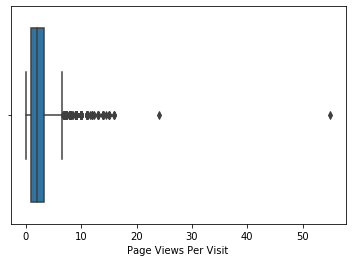

In [71]:
sns.boxplot(inp_leads['Page Views Per Visit'])

In [72]:
percentiles = inp_leads['Page Views Per Visit'].quantile([0.05,0.95]).values
inp_leads['Page Views Per Visit'][inp_leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
inp_leads['Page Views Per Visit'][inp_leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

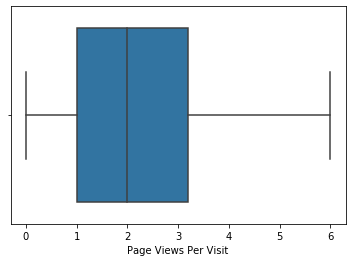

In [73]:
sns.boxplot(inp_leads['Page Views Per Visit'])

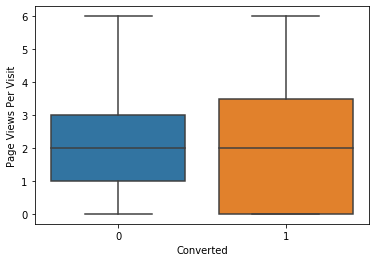

In [74]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = inp_leads)

We can notice taht the Median for converted and unconverted leads is the same.



### Last Activity

In [75]:
inp_leads['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

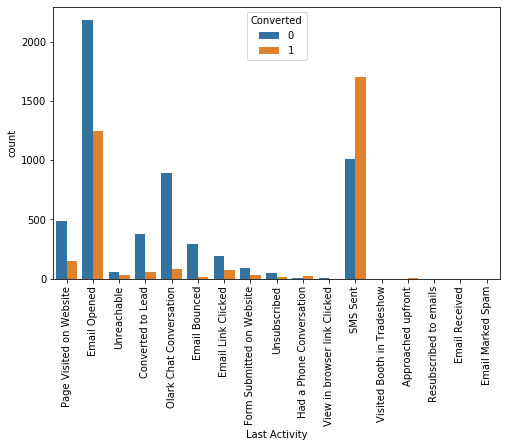

In [76]:
plt.figure(figsize=(8,5))
s1=sns.countplot(inp_leads['Last Activity'], hue=inp_leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [77]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
inp_leads['Last Activity'] = inp_leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

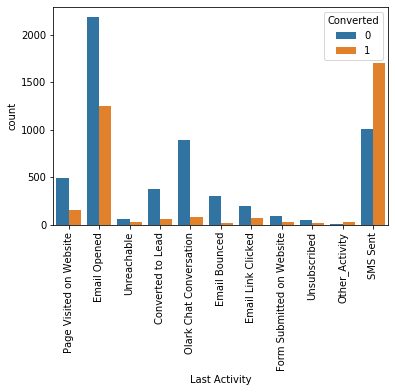

In [79]:
s1=sns.countplot(inp_leads['Last Activity'], hue=inp_leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.b

### Newspaper Article

In [81]:
inp_leads['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

### Outcomes :
Most entries are 'No'.

### X Education Forums

In [82]:
inp_leads['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

Most entries are 'No'.


### Newspaper

In [83]:
inp_leads['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

Most entries are 'No'.


### Digital Advertisement

In [84]:
inp_leads['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

Most entries are 'No'.

### Through Recommendations

In [85]:
inp_leads['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

Most entries are 'No'.

In [88]:
inp_leads['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

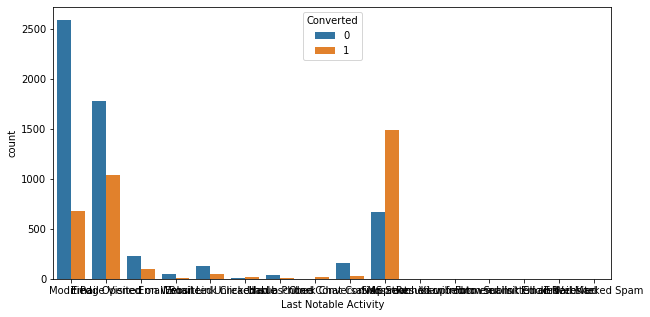

In [89]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = inp_leads)

## Findings

Based on the  analysis we have found that many columns are not woth it , as they are not adding any information to the model, heance we can drop them for frther analysis.

In [92]:
inp_leads = inp_leads.drop(['What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Country'],1)

In [93]:
inp_leads.shape

(9074, 15)

In [94]:
inp_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [139]:
round(100*(inp_leads.isnull().sum()/len(inp_leads.index)),2)

Do Not Call                                             0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
Lead Origin_Landing Page Submission                     0.0
Lead Origin_Lead Add Form                               0.0
Lead Origin_Lead Import                                 0.0
What is your current occupation_Housewife               0.0
What is your current occupation_Other                   0.0
What is your current occupation_Student                 0.0
What is your current occupation_Unemployed              0.0
What is your current occupation_Working Professional    0.0
City_Other Cities                                       0.0
City_Other Cities of Maharashtra                        0.0
City_Other Metro Cities                                 0.0
City_Thane & Outskirts                  

## Numerical Attributes Analysis:

In [96]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(inp_leads['Converted'])/len(inp_leads['Converted'].index))*100
Converted

37.85541106458012

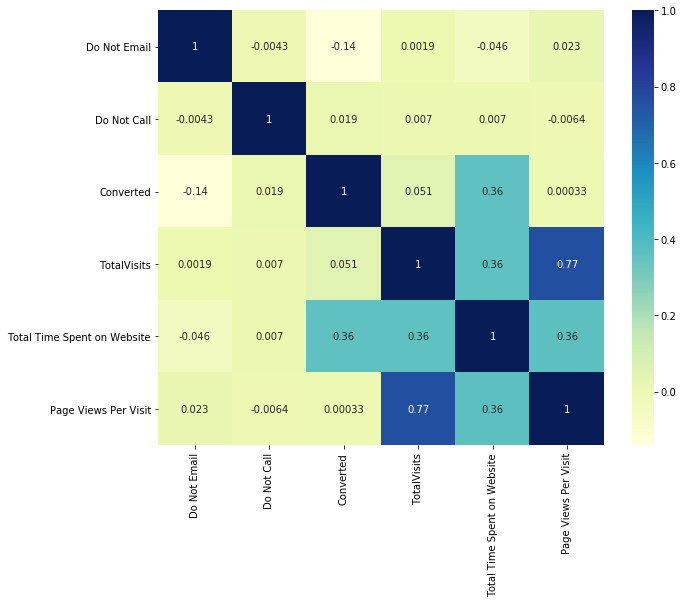

In [97]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(inp_leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

We can clearly notice the corelation between some variables.

# Dummy Variable Creation

In [103]:
#getting a list of categorical columns

cat_cols= inp_leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [104]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
inp_leads[varlist] = inp_leads[varlist].apply(binary_map)

In [105]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(inp_leads[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

inp_leads = pd.concat([inp_leads,dummy],1)

In [107]:
dummy = pd.get_dummies(inp_leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Mentioned'], 1)
inp_leads = pd.concat([inp_leads, dummy], axis = 1)

In [108]:
dummy = pd.get_dummies(inp_leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
inp_leads = pd.concat([inp_leads, dummy], axis = 1)

In [110]:
dummy = pd.get_dummies(inp_leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Other_Activity'], 1)
inp_leads = pd.concat([inp_leads, dummy], axis = 1)

In [121]:
dummy = pd.get_dummies(inp_leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
inp_leads = pd.concat([inp_leads, dummy], axis = 1)

In [122]:
dummy = pd.get_dummies(inp_leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
inp_leads = pd.concat([inp_leads, dummy], axis = 1)

In [125]:
inp_leads.drop(cat_cols,1,inplace = True)

In [126]:
inp_leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,NaN,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,NaN,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,NaN,0,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,NaN,0,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,NaN,0,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [138]:
inp_leads=inp_leads.drop(['Do Not Email'], axis=1)
inp_leads

,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,0.0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.00,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1.0,305,1.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,1,8.0,1845,2.67,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9236,0,0,2.0,238,2.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9237,0,0,2.0,199,2.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9238,0,1,3.0,499,3.00,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Logistic Regression Model Building


Train-Test Split

In [142]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = inp_leads['Converted']

y.head()

X=inp_leads.drop('Converted', axis=1)

# Splitting the data into train and test


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [144]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Call                                           6351 non-null   int64  
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   int64  
 3   Page Views Per Visit                                  6351 non-null   float64
 4   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 6   Lead Origin_Lead Import                               6351 non-null   uint8  
 7   What is your current occupation_Housewife             6351 non-null   uint8  
 8   What is your current occupation_Other                 6

### Scaling of Data

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3009,-0.017749,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.017749,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-0.017749,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4750,-0.017749,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7987,-0.017749,0.643547,2.017593,0.122613,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


### Model Building using Stats Model & RFE

In [146]:
import statsmodels.api as sm

In [147]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [148]:
rfe.support_

array([False, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True])

In [149]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Call', False, 37),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('What is your current occupation_Housewife', False, 33),
 ('What is your current occupation_Other', False, 43),
 ('What is your current occupation_Student', False, 9),
 ('What is your current occupation_Unemployed', False, 7),
 ('What is your current occupation_Working Professional', False, 29),
 ('City_Other Cities', False, 36),
 ('City_Other Cities of Maharashtra', False, 40),
 ('City_Other Metro Cities', False, 39),
 ('City_Thane & Outskirts', False, 25),
 ('City_Tier II Cities', False, 31),
 ('Specialization_Banking, Investment And Insurance', False, 12),
 ('Specialization_Business Administration', False, 32),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 14),
 ('Specialization_I

In [150]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [151]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead 

BUILDING MODEL 1


In [152]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1167.3
Date:                Sun, 06 Sep 2020   Deviance:                       2334.6
Time:                        13:18:41   Pearson chi2:                 8.29e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1771      0.129     -9.160      0.000      -1.429      -0.925
Total Time Spent on Website                       1.1632      0.064     18.174      0.000       1.038       1.289
Lead Origin_Landing Page Submission              -0.8884      0.139     -6.397      0.000      -1.161      -0.616
Lead Origin_Lead Add Form                         1.3285      0.481      2.762      0.006       0.386       2.271
Lead Source_Olark Chat                            0.8748      0.171      5.112      0.000       0.539       1.210
Lead Source_Welingak Website                      3.8150      0.868      4.396      0.000       2.114       5.516
Last Activity_SMS Sent                            1.4091      0.237      5.936      0.000       0.944       1.874
Last Notable Activity_Modified                   -1.5348      0.157     -9.780      0.000      -1.842      -1.227
Last Notable Activity_Olark Chat Conversation    -1.7711      0.434     -4.080      0.000      -2.622      -0.920
Last Notable Activity_SMS Sent                    0.9369      0.272      3.438      0.001       0.403       1.471
Tags_Closed by Horizzon                           6.8546      0.739      9.281      0.000       5.407       8.302
Tags_Interested in other courses                 -1.7796      0.346     -5.142      0.000      -2.458      -1.101
Tags_Lost to EINS                                 6.1857      0.737      8.398      0.000       4.742       7.629
Tags_Other_Tags                                  -2.5335      0.225    -11.276      0.000      -2.974      -2.093
Tags_Ringing                                     -3.8110      0.266    -14.321      0.000      -4.333      -3.289
Tags_Will revert after reading the email          4.9272      0.209     23.630      0.000       4.519       5.336
=================================================================================================================
"""

p-value of variable 'Lead Origin_Lead Add Form' Sites is high, so we can drop it.

In [153]:
#dropping column with high p-value

col = col.drop('Lead Origin_Lead Add Form',1)

BUILDING MODEL 2

In [154]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1171.5
Date:                Sun, 06 Sep 2020   Deviance:                       2342.9
Time:                        13:22:13   Pearson chi2:                 8.24e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1012      0.124     -8.867      0.000      -1.345      -0.858
Total Time Spent on Website                       1.1389      0.063     17.947      0.000       1.015       1.263
Lead Origin_Landing Page Submission              -0.9795      0.135     -7.271      0.000      -1.243      -0.715
Lead Source_Olark Chat                            0.7822      0.167      4.681      0.000       0.455       1.110
Lead Source_Welingak Website                      5.0463      0.743      6.796      0.000       3.591       6.502
Last Activity_SMS Sent                            1.4562      0.236      6.179      0.000       0.994       1.918
Last Notable Activity_Modified                   -1.5659      0.158     -9.940      0.000      -1.875      -1.257
Last Notable Activity_Olark Chat Conversation    -1.7787      0.434     -4.101      0.000      -2.629      -0.929
Last Notable Activity_SMS Sent                    0.9010      0.271      3.323      0.001       0.370       1.432
Tags_Closed by Horizzon                           7.3346      0.728     10.068      0.000       5.907       8.762
Tags_Interested in other courses                 -1.7822      0.347     -5.136      0.000      -2.462      -1.102
Tags_Lost to EINS                                 6.2874      0.735      8.558      0.000       4.847       7.727
Tags_Other_Tags                                  -2.5147      0.224    -11.206      0.000      -2.955      -2.075
Tags_Ringing                                     -3.7616      0.265    -14.191      0.000      -4.281      -3.242
Tags_Will revert after reading the email          5.0631      0.205     24.739      0.000       4.662       5.464
=================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

### Create a dataframe that will contain the names of all the feature variables and their respective VIFs


In [156]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_SMS Sent,6.30
4,Last Activity_SMS Sent,6.05
1,Lead Origin_Landing Page Submission,2.08
5,Last Notable Activity_Modified,1.98
13,Tags_Will revert after reading the email,1.54
2,Lead Source_Olark Chat,1.48
11,Tags_Other_Tags,1.32
0,Total Time Spent on Website,1.30
12,Tags_Ringing,1.29
9,Tags_Interested in other courses,1.14


There is a high correlation between two variables so we drop the variable with the higher valued VIF value

## Dropping variable with high VIF


In [158]:
col = col.drop('Last Notable Activity_SMS Sent',1)

#BUILDING MODEL 3

In [159]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1177.1
Date:                Sun, 06 Sep 2020   Deviance:                       2354.1
Time:                        13:27:21   Pearson chi2:                 8.22e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0401      0.122     -8.530      0.000      -1.279      -0.801
Total Time Spent on Website                       1.1316      0.063     17.960      0.000       1.008       1.255
Lead Origin_Landing Page Submission              -0.9686      0.134     -7.235      0.000      -1.231      -0.706
Lead Source_Olark Chat                            0.8049      0.166      4.845      0.000       0.479       1.130
Lead Source_Welingak Website                      5.0015      0.745      6.711      0.000       3.541       6.462
Last Activity_SMS Sent                            2.1300      0.120     17.752      0.000       1.895       2.365
Last Notable Activity_Modified                   -1.8865      0.132    -14.342      0.000      -2.144      -1.629
Last Notable Activity_Olark Chat Conversation    -1.8572      0.433     -4.291      0.000      -2.706      -1.009
Tags_Closed by Horizzon                           7.5198      0.729     10.314      0.000       6.091       8.949
Tags_Interested in other courses                 -1.7556      0.348     -5.040      0.000      -2.438      -1.073
Tags_Lost to EINS                                 6.3944      0.739      8.652      0.000       4.946       7.843
Tags_Other_Tags                                  -2.4544      0.221    -11.087      0.000      -2.888      -2.021
Tags_Ringing                                     -3.6435      0.260    -14.027      0.000      -4.153      -3.134
Tags_Will revert after reading the email          5.1278      0.208     24.678      0.000       4.721       5.535
=================================================================================================================
"""

In [160]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.06
5,Last Notable Activity_Modified,1.59
4,Last Activity_SMS Sent,1.52
12,Tags_Will revert after reading the email,1.50
2,Lead Source_Olark Chat,1.43
10,Tags_Other_Tags,1.31
0,Total Time Spent on Website,1.30
11,Tags_Ringing,1.27
8,Tags_Interested in other courses,1.13
6,Last Notable Activity_Olark Chat Conversation,1.06


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data

# Getting the Predicted values on the train set


In [161]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.100650
1012    0.067876
9226    0.009558
4750    0.878767
7987    0.999005
1281    0.998142
2880    0.047158
4971    0.962464
7536    0.998015
1248    0.035357
dtype: float64

In [162]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10064994, 0.0678759 , 0.00955824, 0.87876658, 0.99900546,
       0.99814218, 0.04715793, 0.96246417, 0.9980151 , 0.03535732])

In [163]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.100650,3009
1,0,0.067876,1012
2,0,0.009558,9226
3,1,0.878767,4750
4,1,0.999005,7987


In [164]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.100650,3009,0
1,0,0.067876,1012,0
2,0,0.009558,9226,0
3,1,0.878767,4750,1
4,1,0.999005,7987,1


In [165]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3762  143]
 [ 277 2169]]


In [166]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9338686820973076


In [167]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8867538838920687

In [169]:
# Let us calculate specificity
TN / float(TN+FP)

0.9633802816901409

### Calculate False Postive Rate - predicting conversion when customer does not have convert

In [170]:
print(FP/ float(TN+FP))

0.036619718309859155


Positive predictive value 


In [171]:
print (TP / float(TP+FP))

0.9381487889273357


Negative predictive value

In [172]:
print (TN / float(TN+ FN))

0.9314186679871256


## PLOTTING ROC CURVE

In [173]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [174]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

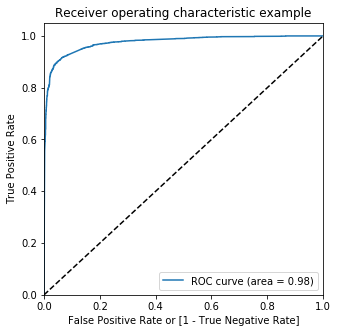

In [175]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value near about to 1. We are getting a very good value of 0.98 indicating a good predictive model.

## Finding Optimal Cutoff Point

In [176]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.100650,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.067876,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.009558,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.878767,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.999005,7987,1,1,1,1,1,1,1,1,1,1,1


In [177]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.859550  0.970564  0.790013
0.2   0.2  0.895450  0.952167  0.859923
0.3   0.3  0.926311  0.919052  0.930858
0.4   0.4  0.931349  0.901063  0.950320
0.5   0.5  0.933869  0.886754  0.963380
0.6   0.6  0.930877  0.867130  0.970807
0.7   0.7  0.926468  0.842191  0.979257
0.8   0.8  0.911353  0.790679  0.986940
0.9   0.9  0.896394  0.745298  0.991037


##### Plot accuracy sensitivity and specificity for various probabilities.


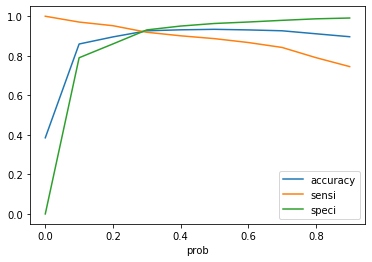

In [178]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

 By looking at the above curve , 0.3 is the optimum point to take it as a cutoff probability.

In [179]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.100650,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.067876,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.009558,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.878767,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.999005,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [180]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.100650,3009,0,10
1,0,0.067876,1012,0,7
2,0,0.009558,9226,0,1
3,1,0.878767,4750,1,88
4,1,0.999005,7987,1,100


##### Check the overall accuracy.


In [181]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9263108171941427

In [182]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3635,  270],
       [ 198, 2248]], dtype=int64)

In [183]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity of our logistic regression model


In [184]:
TP / float(TP+FN)

0.9190515126737531

### Calculate specificity

In [185]:
TN / float(TN+FP)

0.9308578745198464

### Findings:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.98, which is very good. We have the following values for the Train Data:

1) Accuracy : 92.6%

2) Sensitivity : 91.90%

3) Specificity : 93.08%















Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. 

In [186]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06914212548015365


In [187]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8927720413026211


In [188]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9483433342029741


In [189]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3635,  270],
       [ 198, 2248]], dtype=int64)

##### Precision


In [190]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8927720413026211

##### Recall


In [191]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9190515126737531

In [192]:
from sklearn.metrics import precision_score, recall_score

In [193]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8927720413026211

In [194]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9190515126737531

In [195]:
from sklearn.metrics import precision_recall_curve

In [196]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

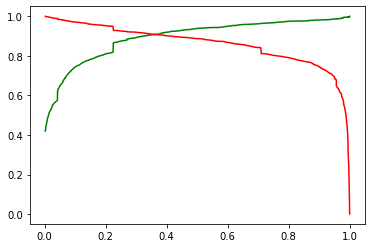

In [197]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Scaling test set

In [199]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3271,0.0,0.304501,-0.591008,0.998931,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0.0,0.666261,1.894051,1.564920,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7936,0.0,-0.419021,-0.743117,-0.133048,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0.0,-1.142542,-0.878732,-1.265027,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3830,0.0,1.751544,-0.578179,2.130909,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [200]:
X_test = X_test[col]

In [202]:
X_test_sm = sm.add_constant(X_test)
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3271,-0.591008,0,0,0,0,0,0,0,0,0,0,0,0
1490,1.894051,1,0,0,0,0,0,0,0,0,0,0,1
7936,-0.743117,0,0,0,0,0,0,0,0,0,0,0,0
4216,-0.878732,0,0,0,0,1,0,1,0,0,0,0,0
3830,-0.578179,1,0,0,0,0,0,0,0,0,0,0,0


###  TEST SET Predictions

In [204]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.153311
1490    0.994844
7936    0.132276
4216    0.973375
3830    0.065196
1800    0.907411
6507    0.014077
4821    0.017240
4223    0.994640
4714    0.271697
dtype: float64

### Converting y_pred

In [205]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [206]:
y_pred_1.head()

,0
3271,0.153311
1490,0.994844
7936,0.132276
4216,0.973375
3830,0.065196


##### Converting y_test to dataframe


In [207]:
y_test_df = pd.DataFrame(y_test)

y_test_df['Prospect ID'] = y_test_df.index    # Putting CustID to index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)   # Appending y_test_df and y_pred_1


In [208]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.153311
1,1,1490,0.994844
2,0,7936,0.132276
3,1,4216,0.973375
4,0,3830,0.065196


# Removing the colomnus

In [209]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.153311
1,1,1490,0.994844
2,0,7936,0.132276
3,1,4216,0.973375
4,0,3830,0.065196


# Rearranging the columns


In [210]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3271,0,0.153311,15
1,1490,1,0.994844,99
2,7936,0,0.132276,13
3,4216,1,0.973375,97
4,3830,0,0.065196,7


In [211]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3271,0,0.153311,15,0
1,1490,1,0.994844,99,1
2,7936,0,0.132276,13,0
3,4216,1,0.973375,97,1
4,3830,0,0.065196,7,0


### Overall accuracy.


In [212]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9144326110907087

In [213]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1600,  134],
       [  99,  890]], dtype=int64)

In [214]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity 

In [215]:
TP / float(TP+FN)

0.8998988877654196

#### Specificity

In [216]:
TN / float(TN+FP)

0.922722029988466

Precision Score

In [217]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.869140625

Recall Score

In [218]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8998988877654196

### Findings:

1) Accuracy : 91.44%
2) Sensitivity : 89.98%
3) Specificity : 92.27%
    
    
    
    
    
    
    
    

# Final Observation:

### Train Data: 
1) Accuracy : 92.6%

2) Sensitivity : 91.90%

3) Specificity : 93.08%



### Test Data: 
1) Accuracy :   91.44%

2) Sensitivity : 89.98%

3) Specificity : 92.27%

 __This  Model seems to be quite good and fit to predict the Conversion Rate very well and we are able to give the CEO confidence in making good calls based on this above model__